<a href="https://colab.research.google.com/github/wankhede10swapnil/Hotel_Bookings_Analysis/blob/main/Copy_of_Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>


how many percentage of  bookings have been cancelled months wise?

how many people have cancelled their reservations in the month of july?

which type of hotels are mostly booked in weekend nights?

top three repeated guests in resort hotel

top three repeated guests in city hotel

find the deposit-type of the customers having children

which customers have waited for maximum number of days to get booking

top 3 special guests whic are also repeated guests

which type of hotel get maximum number of cancellation of bookings

how many couples with children ordered meal?

maximun number of reseervation_status as checked_out

average booking charges of country GBR?


In [1]:
# importing packages
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path ='/content/drive/MyDrive/Colab Notebooks/Capstone_Project/Hotel_Booking_Analysis/Copy of Copy of Hotel Bookings.csv' 
hotel_data_raw = pd.read_csv(path)

In [4]:
hotel_data_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hotel_data_raw.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [6]:
hotel_data = hotel_data_raw.drop(hotel_data_raw.duplicated().value_counts())

In [7]:
hotel_data = hotel_data_raw.drop_duplicates(keep ='first')

In [8]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [9]:
hotel_data.shape

(87396, 32)

In [10]:
#  to check null values
hotel_data.isnull().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [11]:
# filling of missing values
hotel_data['company'].fillna('0.0',inplace=True)
hotel_data['agent'].fillna('0.0',inplace=True)
hotel_data['country'].fillna('other',inplace=True)
hotel_data['children'].fillna('0',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [12]:
hotel_data.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [13]:
print(hotel_data['arrival_date_month'].value_counts())


August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64


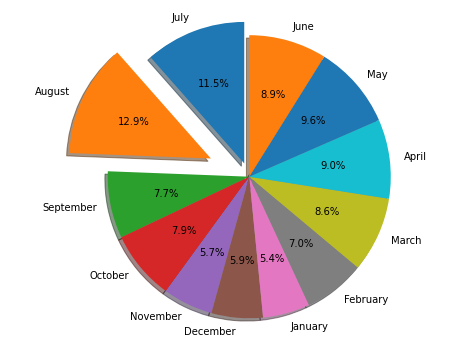

"\n# Plotting the pie chart for above dataframe\ndataframe.groupby(['arrival_date_month']).sum().plot(\n    kind='pie', y=', \n  autopct='%1.0f%%', colors=colors)"

In [34]:
import matplotlib.pyplot as plt
fig = plt.gcf() 
fig.set_size_inches(8, 6) 

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['July', 'August', 'September', 'October', 'November', 'December','January', 'February', 'March', 'April', 'May', 'June']
sizes = [10057,11257,6690,6934,4995,5131,4695,6098,7513,7908,8355,7765]
explode = (0.1, 0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Aug')
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
'''
# Plotting the pie chart for above dataframe
dataframe.groupby(['arrival_date_month']).sum().plot(
    kind='pie', y=', 
  autopct='%1.0f%%', colors=colors)'''

In [14]:
print(hotel_data['is_canceled'].value_counts())

0    63371
1    24025
Name: is_canceled, dtype: int64


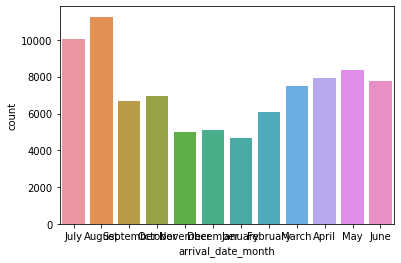

In [15]:
sns.countplot(x='arrival_date_month',  data=hotel_data)


In [21]:
hotel_data_raw.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
pd.crosstab(index=hotel_data['arrival_date_month'], columns=hotel_data['is_canceled'])

is_canceled,0,1
arrival_date_month,,
April,5499,2409
August,7634,3623
December,3753,1378
February,4683,1415
January,3655,1038
July,6859,3198
June,5411,2354
March,5683,1830
May,5913,2442


conculsion:
In the month of july, 3198 booking have been cancelled.

In [ ]:
print(hotel_data['hotel'].value_counts())

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64


In [ ]:
print(hotel_data['stays_in_weekend_nights'].value_counts())

0     35151
2     26414
1     22657
4      1734
3      1150
6       113
5        70
8        60
7        15
9        10
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64


In [ ]:
pd.crosstab(index=hotel_data['hotel'], columns=hotel_data['stays_in_weekend_nights'])

stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19
hotel,,,,,,,,,,,,,,,,,
City Hotel,23249,15171,14308,301,277,42,39,6,24,5,2,0,1,2,1,0,0
Resort Hotel,11902,7486,12106,849,1457,28,74,9,36,5,5,5,2,0,2,1,1


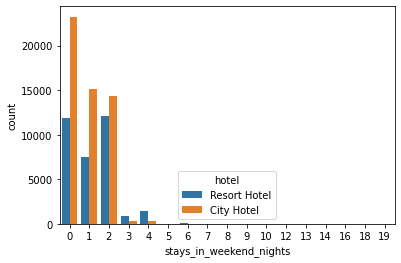

In [ ]:
# grouped by plot
sns.countplot(x='stays_in_weekend_nights',data=hotel_data, hue= 'hotel')

 which type of hotels are mostly booked in weekend nights?

 conl: city hotels are mostly booked in weekend nights.
 

In [ ]:
# which type of hotel get maximum number of cancellation of bookings:
# let's deal with question

In [ ]:
print(hotel_data['is_canceled'].value_counts())

0    63371
1    24025
Name: is_canceled, dtype: int64


In [ ]:
hotel_data['hotel'].value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

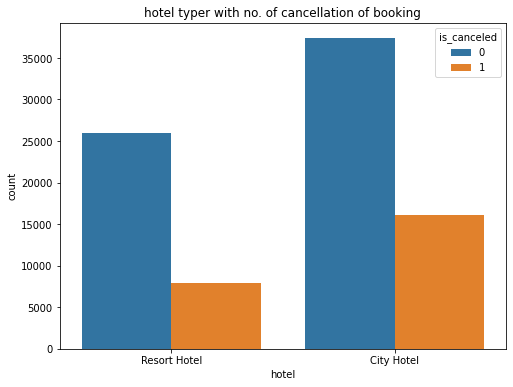

In [ ]:
'''# create
#a =  hotel_data['hotel'].value_counts()
#create the plot object
a.plot(kind='bar',stacked=True,hue=)
# set the display figure size using rcParams method
plt.rcParams['figure.figsize']=(10,5)
plt.title('hotel types with cancelation')
plt.xlabel('hotel types')'''


# ploting count plot 
  
fig = plt.gcf() 
fig.set_size_inches(8, 6) 
plt.title("hotel typer with no. of cancellation of booking") 



sns.countplot(dx='hotel'data=hotel_data, hue = 'is_canceled')

conclusion:
which type of hotel get maximum number of cancellation of bookings:
we can see city hotel get maximum number of cancellation of bookings as compare to resort Hotel.